In [1]:
from model.model_torch import Model
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [2]:
model = Model(10, 1)
# 打印模型结构
print(model)
# 打印模型参数数值
for name, param in model.named_parameters():
    print(name, param)

Model(
  (linear1): Linear(in_features=2, out_features=10, bias=False)
  (tanh): Tanh()
  (linear2): Linear(in_features=10, out_features=1, bias=False)
  (divide): DivideByConstantLayer()
)
linear1.weight Parameter containing:
tensor([[ 2.1380,  0.8929],
        [-1.7919,  0.3056],
        [-1.8884, -0.0131],
        [-1.1758,  3.2247],
        [ 1.0577, -1.3107],
        [ 0.2127,  0.7782],
        [-0.6442, -0.6455],
        [-0.5260, -0.1293],
        [ 1.0540,  1.2840],
        [-0.1586,  1.6983]], requires_grad=True)
linear2.weight Parameter containing:
tensor([[ 0.3381, -0.9064, -0.2373, -0.2710, -0.5559, -0.2232,  0.5375,  0.1231,
          0.0934,  0.3698]], requires_grad=True)


In [3]:
theta = torch.cat([p.view(-1) for p in model.parameters()])
print(theta)

tensor([ 2.1380,  0.8929, -1.7919,  0.3056, -1.8884, -0.0131, -1.1758,  3.2247,
         1.0577, -1.3107,  0.2127,  0.7782, -0.6442, -0.6455, -0.5260, -0.1293,
         1.0540,  1.2840, -0.1586,  1.6983,  0.3381, -0.9064, -0.2373, -0.2710,
        -0.5559, -0.2232,  0.5375,  0.1231,  0.0934,  0.3698],
       grad_fn=<CatBackward0>)


In [4]:
# theta - 1
theta = theta - 1
print(theta)

tensor([ 1.1380, -0.1071, -2.7919, -0.6944, -2.8884, -1.0131, -2.1758,  2.2247,
         0.0577, -2.3107, -0.7873, -0.2218, -1.6442, -1.6455, -1.5260, -1.1293,
         0.0540,  0.2840, -1.1586,  0.6983, -0.6619, -1.9064, -1.2373, -1.2710,
        -1.5559, -1.2232, -0.4625, -0.8769, -0.9066, -0.6302],
       grad_fn=<SubBackward0>)


In [5]:
for p, theta_i in zip(model.parameters(), theta.split([p.numel() for p in model.parameters()])):
    p.data = theta_i.view(p.size())
for name, param in model.named_parameters():
    print(name, param)

linear1.weight Parameter containing:
tensor([[ 1.1380, -0.1071],
        [-2.7919, -0.6944],
        [-2.8884, -1.0131],
        [-2.1758,  2.2247],
        [ 0.0577, -2.3107],
        [-0.7873, -0.2218],
        [-1.6442, -1.6455],
        [-1.5260, -1.1293],
        [ 0.0540,  0.2840],
        [-1.1586,  0.6983]], requires_grad=True)
linear2.weight Parameter containing:
tensor([[-0.6619, -1.9064, -1.2373, -1.2710, -1.5559, -1.2232, -0.4625, -0.8769,
         -0.9066, -0.6302]], requires_grad=True)


In [1]:
import matplotlib.pyplot as plt
import json

# 加载训练历史
with open('save/SAV_D40_10000_lr02_1000_torch_PaperData_history.json', 'r') as f:
    SAV_history_dict = json.load(f)

with open('save/Ref_SAV_D40_10000_lr02_1000_torch_PaperData_history.json', 'r') as f:
    Ref_SAV_history_dict = json.load(f)

In [2]:
# 每个json都有三个key，分别是train_loss,test_loss,relative_error
my_train_loss = SAV_history_dict['train_loss']
my_test_loss = SAV_history_dict['test_loss']
my_relative_error = SAV_history_dict['relative_error']
ref_train_loss = Ref_SAV_history_dict['train_loss']
ref_test_loss = Ref_SAV_history_dict['test_loss']
ref_relative_error = Ref_SAV_history_dict['relative_error']

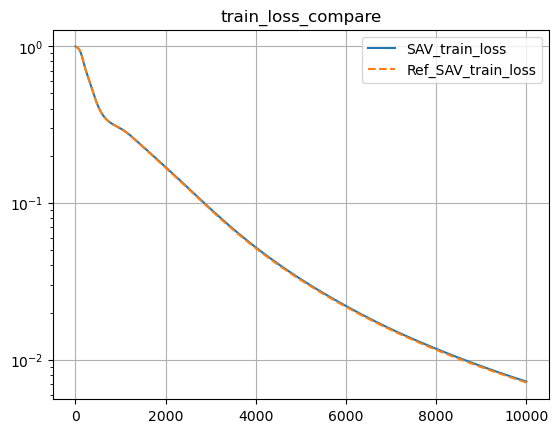

In [5]:
# 绘制三个图
plt.figure()
plt.title('train_loss_compare')
plt.plot(my_train_loss, label='SAV_train_loss')
# 虚线
plt.plot(ref_train_loss, label='Ref_SAV_train_loss', linestyle='--')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

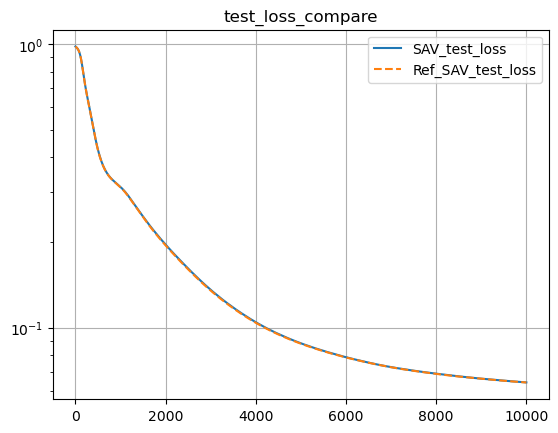

In [6]:
plt.figure()
plt.title('test_loss_compare')
plt.plot(my_test_loss, label='SAV_test_loss')
plt.plot(ref_test_loss, label='Ref_SAV_test_loss', linestyle='--')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

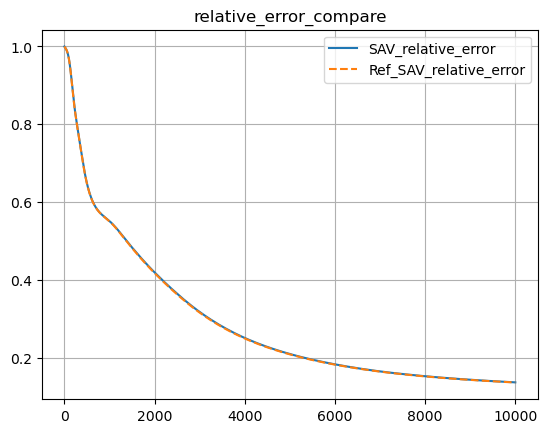

In [8]:
# 由于relative_error的值太小，所以取对数
plt.figure()
plt.title('relative_error_compare')
plt.plot(my_relative_error, label='SAV_relative_error')
plt.plot(ref_relative_error, label='Ref_SAV_relative_error', linestyle='--')
plt.grid()
plt.legend()
plt.show()